**Machine Learning Intern Assessment Assignment**

**Assignment Title : Customer Churn Prediction**

Objective:
Develop a machine learning model to predict customer churn based on historical customer data. You
will follow a typical machine learning project pipeline, from data preprocessing to model deployment.

In [1]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/844/1*MyKDLRda6yHGR_8kgVvckg.png')

**What is customer churn?**

Customer churn, also known as customer attrition, refers to the phenomenon where customers stop doing business with a company or discontinue using its products or services. In other words, it's the rate at which customers stop being customers of a company. Churn can occur for various reasons, such as dissatisfaction with the product or service, competitive offerings, changes in customer needs, or other external factors. Businesses often monitor and manage customer churn to retain existing customers and maintain a stable customer base.

**1. Data Preprocessing:**


**Importing Libraries for Dataset Analysis & Visualization**

In [2]:
!pip install mlens

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 2.9 MB/s eta 0:00:00


In [3]:
!pip install Sequence

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for Sequence: filename=sequence-0.3.4-py3-none-any.whl size=5397 sha256=0b5ae37ba16d169088c33daf9b211a14963d206fbe2e5676fa550b33d6baf4f7
  Stored in directory: /root/.cache/pip/wheels/4c/bd/44/af4ff25940a673c359d905591bad7468270108e1d2255bd720
  Created wheel for daytime: filename=daytime-0.4-py3-none-any.whl size=2401 sha256=d79c42a2f558b95bb2c2687dde3960c3743b4cd239b3b1e09aa272ea6b148aaa
  Stored in directory: /root/.cache/pip/wheels/cd/40/c7/fc109bc6716d31e4d5fdc0cd72891253fa46032e71d9aa1b93
Successfully built Sequence daytime


In [4]:
# handle table-like data and matrices
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)


# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# balance data
from imblearn.over_sampling import BorderlineSMOTE

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.neural_network import MLPClassifier

# evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
## Reading the Dataset

df = pd.read_excel('//content//customer_churn_large_dataset.xlsx')


In [7]:
## Top 5

df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [8]:
## Below 5 data

df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [9]:
## Shape of the Dataset

df.shape

(100000, 9)

That is, Dataset contains 100000 rows and 9 columns


In [10]:
## Columns

df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [11]:
## Information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


Which shows that Dataset does not contain any features which has null values, 3 feature Name and Gender,Location are categorical rest are numerical features

In [12]:
## Checking null values again
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [13]:
## Checking Duplicated values

df.duplicated().sum()

0

In [14]:
## Unique values of Categorical features
for col in df:
    print(col , "\n" , df[col].unique() , "\n")

CustomerID 
 [     1      2      3 ...  99998  99999 100000] 

Name 
 ['Customer_1' 'Customer_2' 'Customer_3' ... 'Customer_99998'
 'Customer_99999' 'Customer_100000'] 

Age 
 [63 62 24 36 46 67 30 20 53 50 44 34 28 42 55 43 31 41 58 64 70 18 25 27
 66 29 60 26 45 19 37 49 38 57 47 48 40 21 33 51 35 69 61 52 39 56 59 65
 22 54 68 32 23] 

Gender 
 ['Male' 'Female'] 

Location 
 ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston'] 

Subscription_Length_Months 
 [17  1  5  3 19 15 10 12 20 13  8 23  2  4 18  9 14 16  6  7 24 22 11 21] 

Monthly_Bill 
 [73.36 48.76 85.47 ... 75.21 41.98 83.55] 

Total_Usage_GB 
 [236 172 460 297 266 456 269 396 150 383 442 295 148 239 233 231 198 354
 429 243 270 389 226 393  89 183 135 185 151 115 194 278 423 202 495 162
 101 294 122 305 212 220 253 411 447 218 221 166  64  67 391 232 298 334
 326 459 371 299 376 214 329  50 444 113  76 134 184 319 235  85 332  73
 369 308 446 321  83 114 296 102 215 169 225 140  84 463 402 468 375 366
 404 471 204 320

In [15]:
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [16]:
## Contribution of Boys Vs Girls in churn

print(f'A female customer has a probability of {round(df[(df["Gender"] == "Female") & (df["Churn"] == 1)].count()[0] / df[(df["Gender"] == "Female")].count()[0] *100,2)} % Churn')

print(f'A male customer has a probability of {round(df[(df["Gender"] == "Male") & (df["Churn"] == 1)].count()[0] / df[(df["Gender"] == "Male")].count()[0] *100,2)} % Churn')

A female customer has a probability of 49.67 % Churn
A male customer has a probability of 49.89 % Churn


There is negligible difference in customer percentage who changed the service provider. Both genders behaved in similar way when it comes to migrating to another service provider.

**Distrubution of Churn vs Not Churn among the customer in dataset?**

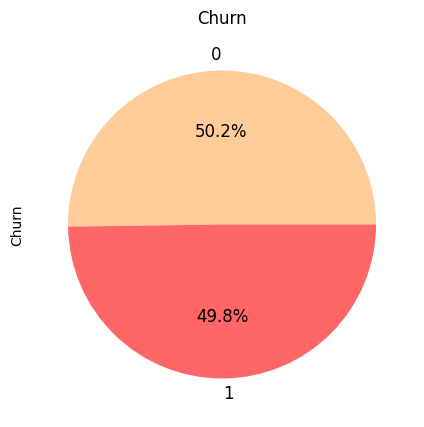

In [17]:
# pie chart
def fig_piechart(df, col):
    fig = plt.figure(figsize=(5,5))
    fig.set_facecolor('white')
    colors = ['#ffcc99', '#ff6666', '#99ff99', '#66b3ff', '#c2c2f0','#ffb3e6']
    ax = (df[col].value_counts()*100.0/len(df)).plot.pie(legend=False, autopct='%1.1f%%', fontsize=12, colors=colors)
    ax.set_title(col)
    plt.show()

fig_piechart(df,'Churn')

In [18]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

**Outliers Detection**

In [19]:
df=df.drop(labels=['Name','CustomerID'],axis=1)


In [20]:
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(df[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = df[i][(df[i] > ul) | (df[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')

In [21]:
detect_outliers(['Subscription_Length_Months','Monthly_Bill','Total_Usage_GB'])

*** Subscription_Length_Months outlier points*** 
 Series([], Name: Subscription_Length_Months, dtype: int64) 

*** Monthly_Bill outlier points*** 
 Series([], Name: Monthly_Bill, dtype: float64) 

*** Total_Usage_GB outlier points*** 
 Series([], Name: Total_Usage_GB, dtype: int64) 



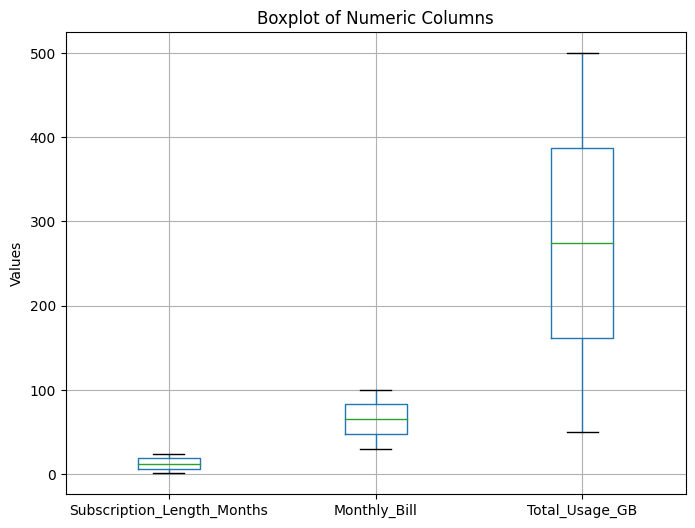

In [22]:
# Plot boxplots for the three numeric columns
plt.figure(figsize=(8, 6))  # Set the figure size

# Create a boxplot using pandas DataFrame
df.boxplot(column=['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB'])

# Set labels and title
plt.title('Boxplot of Numeric Columns')
plt.ylabel('Values')
plt.xticks([1, 2, 3], ['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB'])

# Show the plot
plt.show()

There is No outlier

**Check for Rare Categoeis**

Some categories may appear a lot in the dataset, whereas some other categories appear only in a few number of observations.

Rare values in categorical variables tend to cause over-fitting, particularly in tree based methods.
Rare labels may be present in training set, but not in test set, therefore causing over-fitting to the train set.
Rare labels may appear in the test set, and not in the train set. Thus, the machine learning model will not know how to evaluate it.

In [23]:
categorical = [var for var in df.columns if df[var].dtype=='O']

In [24]:
# check the number of different labels
for var in categorical:
    print(df[var].value_counts() / np.float(len(df)))
    print()
    print()

Female    0.50216
Male      0.49784
Name: Gender, dtype: float64


Houston        0.20157
Los Angeles    0.20041
Miami          0.20031
Chicago        0.19958
New York       0.19813
Name: Location, dtype: float64




**Categorical Variables Encoding**

In [25]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

In [26]:
df['Location'] = df['Location'].map({'Houston':0,'Los Angeles':1,'Miami':2,'Chicago':3,'New York':4})

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  int64  
 2   Location                    100000 non-null  int64  
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 5.3 MB


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,44.027020,15.280283,18.0,31.00,44.00,57.00,70.0
Gender,100000.0,0.497840,0.499998,0.0,0.00,0.00,1.00,1.0
Location,100000.0,1.992290,1.413772,0.0,1.00,2.00,3.00,4.0
Subscription_Length_Months,100000.0,12.490100,6.926461,1.0,6.00,12.00,19.00,24.0
Monthly_Bill,100000.0,65.053197,20.230696,30.0,47.54,65.01,82.64,100.0
Total_Usage_GB,100000.0,274.393650,130.463063,50.0,161.00,274.00,387.00,500.0
Churn,100000.0,0.497790,0.499998,0.0,0.00,0.00,1.00,1.0


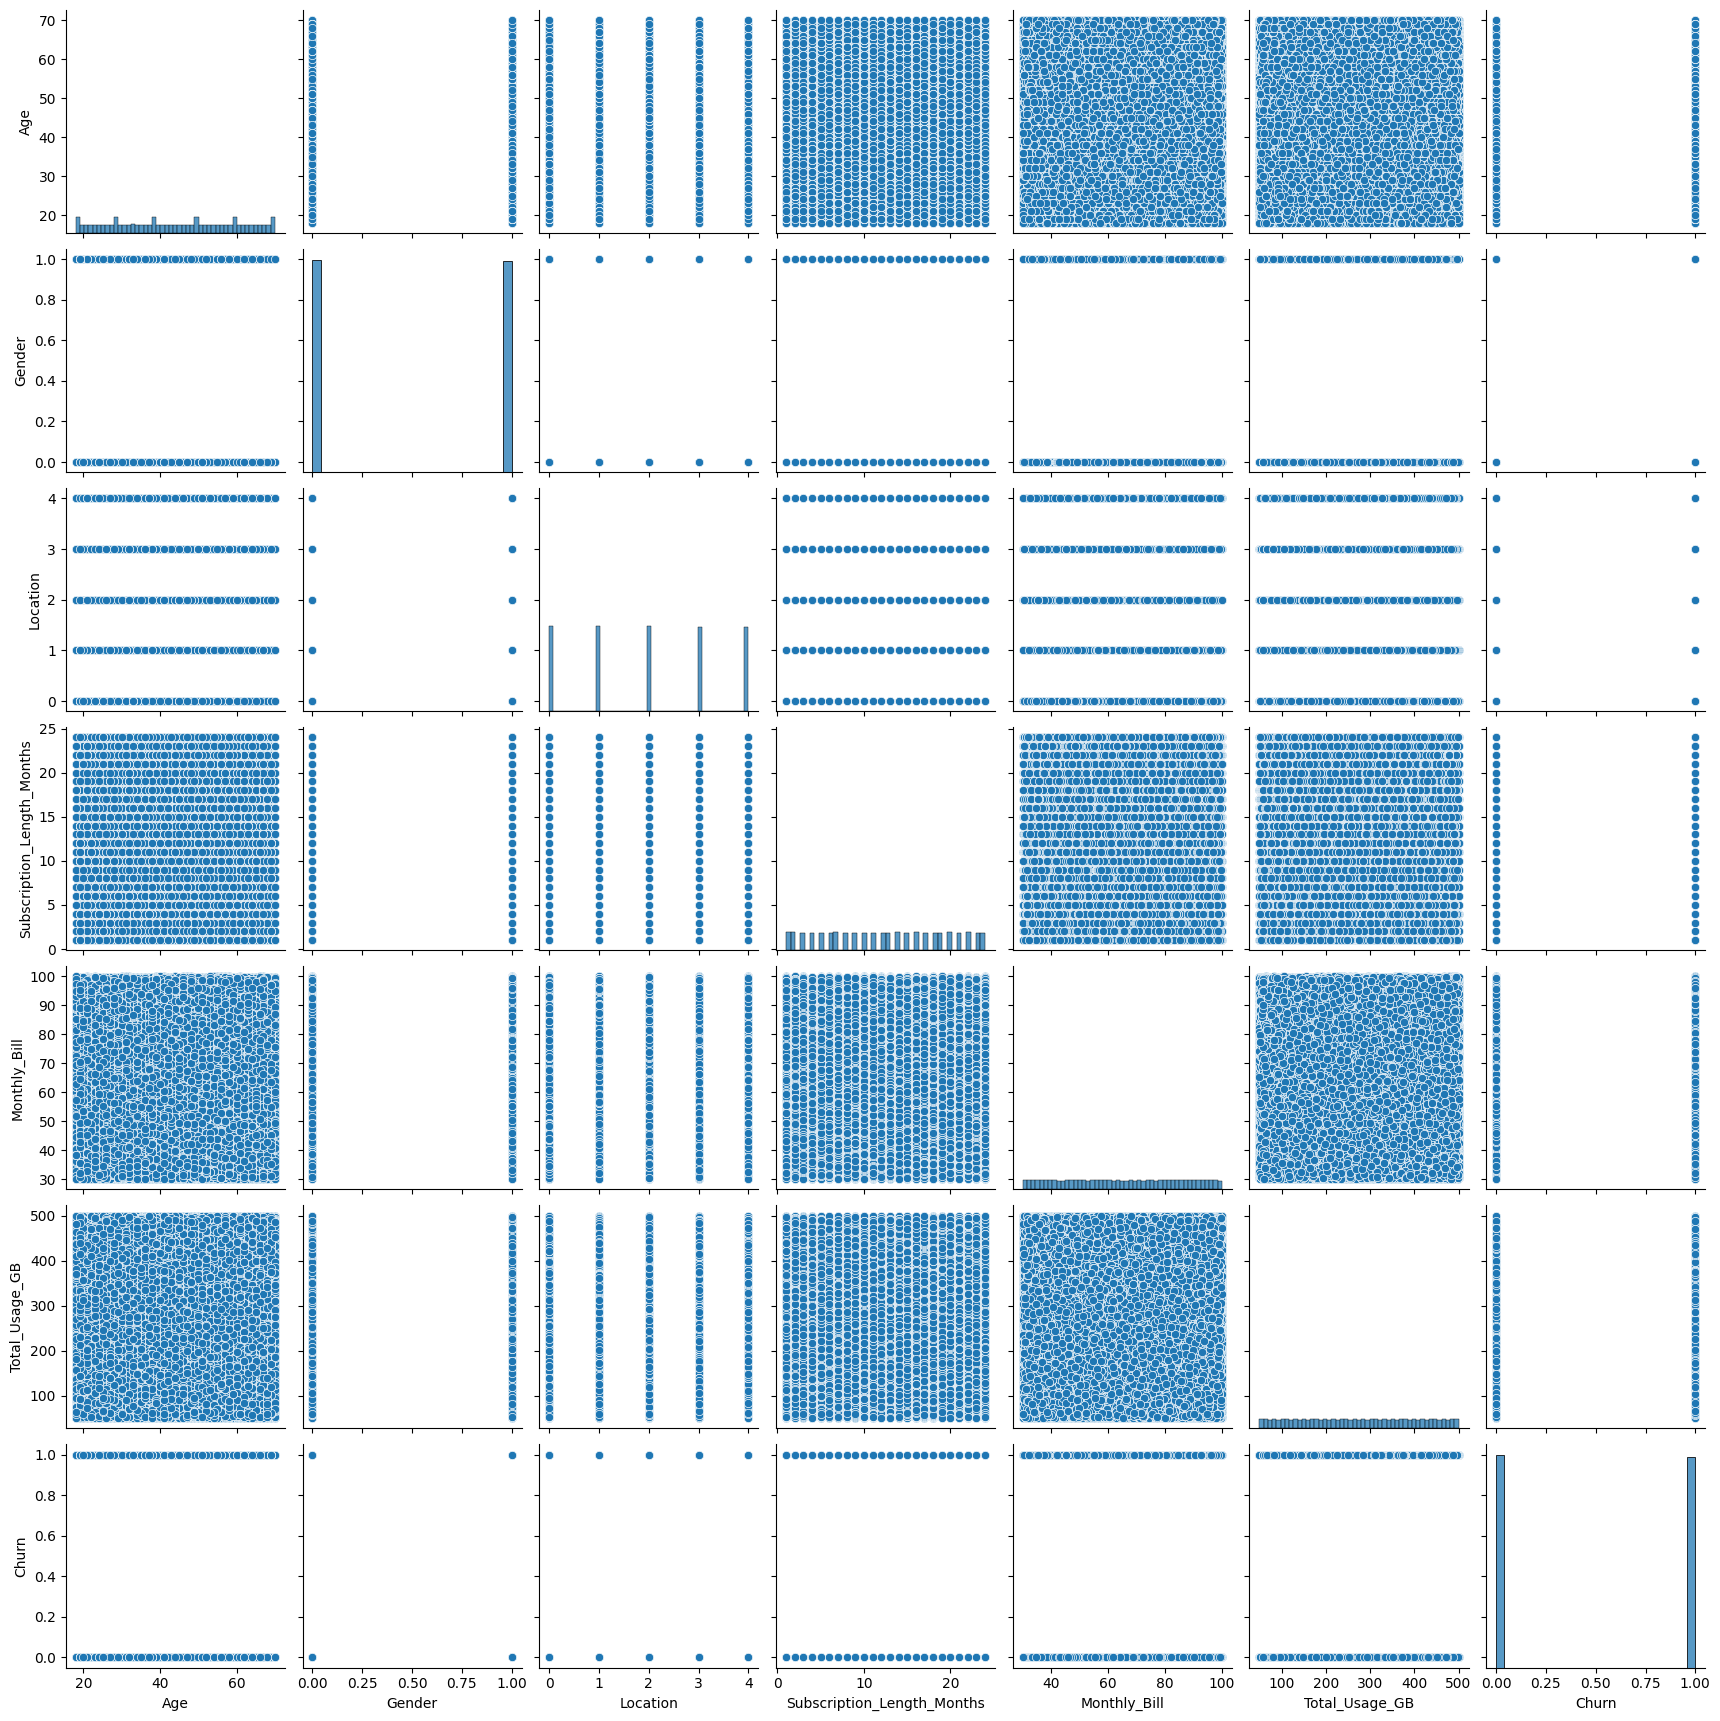

In [34]:
sns.pairplot(df)

<Axes: >

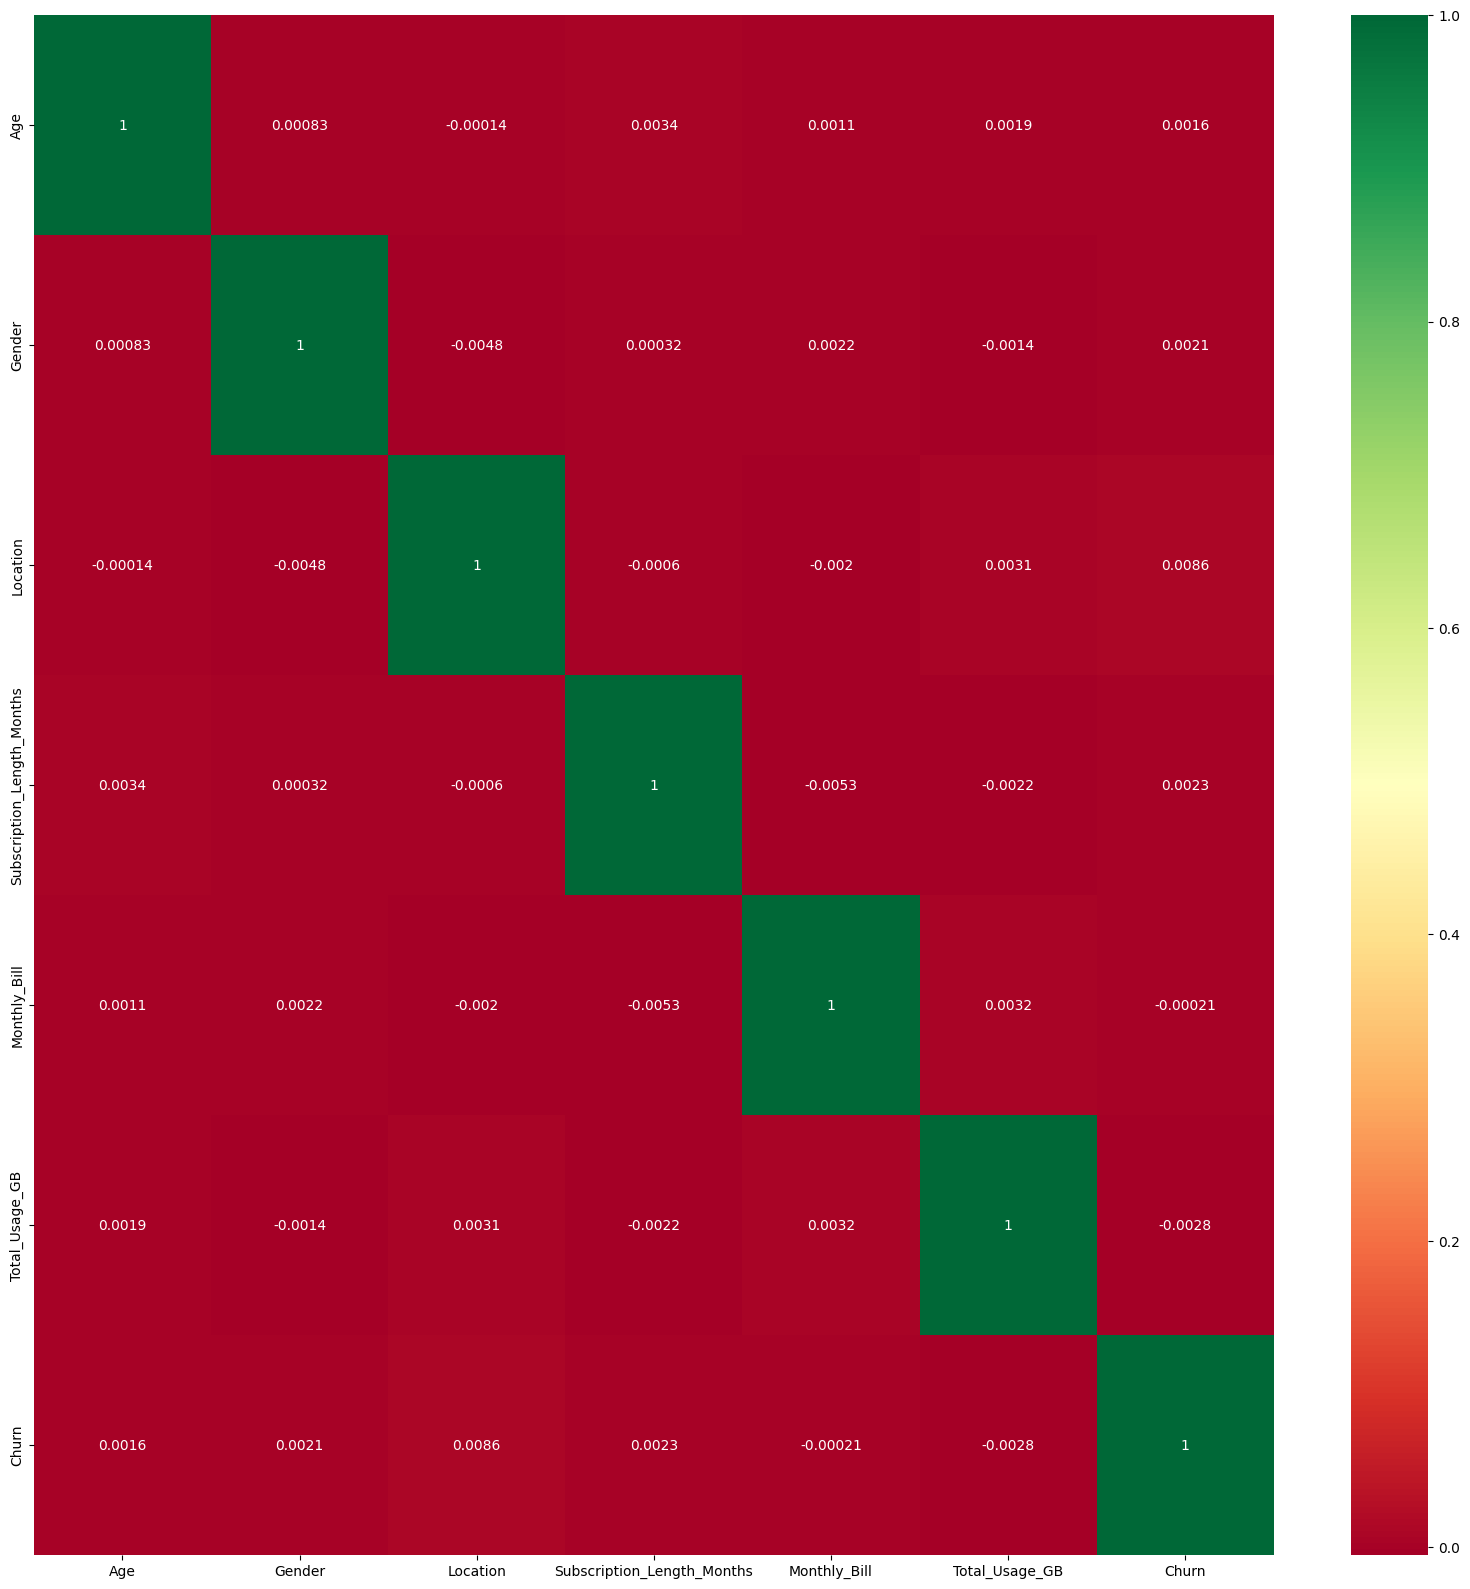

In [29]:
# Plotting The Correlations between all the features
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

From these we can see that features are not correlated

**Splitting the Dataset into Independent and Dependent features**

In [30]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

**Splitting the Dataset into training and testing**

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((75000, 6), (25000, 6))

**Feature Scaling**

In [33]:
scaler = StandardScaler()
X_train[['Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']] = scaler.fit_transform(X_train[['Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']])
X_test[['Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']] = scaler.transform(X_test[['Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']])

**Modelling and Parameter Optimization**

In [35]:
CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

**Model1 : Logistic Regression**

In [36]:
LR_S = LogisticRegression(random_state = 42)
params_LR = {'C': list(np.arange(1,12)), 'penalty': ['l2', 'elasticnet', 'none'], 'class_weight': ['balanced','None']}
grid_LR = RandomizedSearchCV(LR_S, param_distributions=params_LR, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_LR.fit(X_train, y_train)
print('Best parameters:', grid_LR.best_estimator_)

Best parameters: LogisticRegression(C=10, class_weight='balanced', random_state=42)


In [37]:
LR = LogisticRegression(random_state = 42, penalty= 'l2', class_weight= 'balanced', C=10)
cross_val_LR_Acc = cross_val_score(LR, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_LR_f1 = cross_val_score(LR, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_LR_AUC = cross_val_score(LR, X_train, y_train, cv = CV, scoring = 'roc_auc')

**Model2: Random Forest**

In [38]:
RF_S = RandomForestClassifier(random_state = 42)
params_RF = {'n_estimators': list(range(100,200)), 'min_samples_leaf': list(range(1,10)), 'min_samples_split': list(range(1,10))}
grid_RF = RandomizedSearchCV(RF_S, param_distributions=params_RF, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_RF.fit(X_train, y_train)
print('Best parameters:', grid_RF.best_estimator_)

Best parameters: RandomForestClassifier(min_samples_leaf=6, min_samples_split=8,
                       n_estimators=126, random_state=42)


In [41]:
RF = RandomForestClassifier(n_estimators=126, random_state=42)
cross_val_RF_Acc = cross_val_score(RF, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_RF_f1 = cross_val_score(RF, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_RF_AUC = cross_val_score(RF, X_train, y_train, cv = CV, scoring = 'roc_auc')

**Model3: KNN**

In [42]:
KNN_S = KNeighborsClassifier()
params_KNN = {'n_neighbors': list(range(1,20))}
grid_KNN = RandomizedSearchCV(KNN_S, param_distributions=params_KNN, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_KNN.fit(X_train, y_train)
print('Best parameters:', grid_KNN.best_estimator_)

Best parameters: KNeighborsClassifier(n_neighbors=2)


In [43]:
KNN = KNeighborsClassifier(n_neighbors=2)
cross_val_KNN_Acc = cross_val_score(KNN, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_KNN_f1 = cross_val_score(KNN, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_KNN_AUC = cross_val_score(KNN, X_train, y_train, cv = CV, scoring = 'roc_auc')

**Model4: Decision Tree**

In [44]:
DT_S = DecisionTreeClassifier(random_state=42)
params_DT = {'min_samples_leaf': list(range(1,6)), 'min_samples_split': list(range(1,6))}
grid_DT = RandomizedSearchCV(DT_S, param_distributions=params_DT, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_DT.fit(X_train, y_train)
print('Best parameters:', grid_DT.best_estimator_)

Best parameters: DecisionTreeClassifier(min_samples_split=4, random_state=42)


In [45]:
DT = DecisionTreeClassifier(random_state=42,min_samples_leaf=4)
cross_val_DT_Acc = cross_val_score(DT, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_DT_f1 = cross_val_score(DT, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_DT_AUC = cross_val_score(DT, X_train, y_train, cv = CV, scoring = 'roc_auc')

**Model5: Adaboost**

In [46]:
AB_S = AdaBoostClassifier(random_state=42)
params_AB = {'n_estimators': list(np.arange(50,100,10)), 'learning_rate':[0.01, 0.1, 1]}
grid_AB = RandomizedSearchCV(AB_S, param_distributions=params_AB, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_AB.fit(X_train, y_train)
print('Best parameters:', grid_AB.best_estimator_)

Best parameters: AdaBoostClassifier(learning_rate=1, n_estimators=80, random_state=42)


In [47]:
AB = AdaBoostClassifier(learning_rate=1, n_estimators=80, random_state=42)
cross_val_AB_Acc = cross_val_score(AB, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_AB_f1 = cross_val_score(AB, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_AB_AUC = cross_val_score(AB, X_train, y_train, cv = CV, scoring = 'roc_auc')

**Model6: XGBoost**

In [48]:
XG_S = XGBClassifier(random_state=42)
params_XG = {'n_estimators': list(np.arange(50,150,10)), 'learning_rate':[0.01, 0.1, 1]}
grid_XG = RandomizedSearchCV(XG_S, param_distributions=params_XG, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_XG.fit(X_train, y_train)
print('Best parameters:', grid_XG.best_estimator_)

Best parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=130, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)


In [49]:
XG = XGBClassifier(learning_rate=1, n_estimators=130, random_state=42)
cross_val_XG_Acc = cross_val_score(XG, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_XG_f1 = cross_val_score(XG, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_XG_AUC = cross_val_score(XG, X_train, y_train, cv = CV, scoring = 'roc_auc')

**Model7: Extra Tree Classifier**

In [50]:
ET_S = ExtraTreesClassifier(random_state=42)
params_ET = {'n_estimators': list(np.arange(50,150,10))}
grid_ET = RandomizedSearchCV(XG_S, param_distributions=params_ET, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_ET.fit(X_train, y_train)
print('Best parameters:', grid_ET.best_estimator_)

Best parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=110, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)


In [51]:
ET = ExtraTreesClassifier(n_estimators=90, random_state=42)
cross_val_ET_Acc = cross_val_score(ET, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_ET_f1 = cross_val_score(ET, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_ET_AUC = cross_val_score(ET, X_train, y_train, cv = CV, scoring = 'roc_auc')

**Stacking**

In [52]:
estimators = [('DT', DT),
              ('RF', RF),
              ('ET', ET),
              ('LR', LR),
              ('KNN', KNN),
              ('XG', XG),
              ('AB', AB)]

Stack = StackingClassifier(estimators = estimators, final_estimator = MLPClassifier())

In [53]:
cross_val_ST_Acc = cross_val_score(Stack, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_ST_f1 = cross_val_score(Stack, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_ST_AUC = cross_val_score(Stack, X_train, y_train, cv = CV, scoring = 'roc_auc')

**Feature Importance**

What features contribute more to predict the target (Churn)? let's find out how useful they are at predicting the target variable.

Random Forest algorithm offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.

In [54]:
RF_I = RandomForestClassifier(n_estimators=60, random_state=42)
RF_I.fit(X, y)

RandomForestClassifier(n_estimators=60, random_state=42)

In [55]:
d = {'Features': X_train.columns, 'Feature Importance': RF_I.feature_importances_}
df = pd.DataFrame(d)
df_sorted = df.sort_values(by='Feature Importance', ascending = True)
df_sorted
df_sorted.style.background_gradient(cmap='Blues')

,Features,Feature Importance
1,Gender,0.018062
2,Location,0.045050
3,Subscription_Length_Months,0.135421
0,Age,0.184314
5,Total_Usage_GB,0.294445
4,Monthly_Bill,0.322707


**Result**

In [57]:
compare_models = [('Logistic Regression', cross_val_LR_Acc.mean(),cross_val_LR_f1.mean(),cross_val_LR_AUC.mean(), ''),
                  ('Random Forest', cross_val_RF_Acc.mean(),cross_val_RF_f1.mean(),cross_val_RF_AUC.mean(), ''),
                  ('KNN', cross_val_KNN_Acc.mean(),cross_val_KNN_f1.mean(),cross_val_KNN_AUC.mean(), ''),
                  ('Decision Tree', cross_val_DT_Acc.mean(), cross_val_DT_f1.mean(),cross_val_DT_AUC.mean(), ''),
                  ('Ada Boost', cross_val_AB_Acc.mean(), cross_val_AB_f1.mean(),cross_val_AB_AUC.mean(), ''),
                  ('XG Boost', cross_val_XG_Acc.mean(), cross_val_XG_f1.mean(),cross_val_XG_AUC.mean(), ''),
                  ('Extra Tree', cross_val_ET_Acc.mean(), cross_val_ET_f1.mean(),cross_val_ET_AUC.mean(), ''),
                  ('Stacking', cross_val_ST_Acc.mean(), cross_val_ST_f1.mean(),cross_val_ST_AUC.mean(), 'best model')]

In [58]:
compare = pd.DataFrame(data = compare_models, columns=['Model','Accuracy Mean', 'F1 Score Mean', 'AUC Score Mean', 'Description'])
compare.style.background_gradient(cmap='YlGn')

,Model,Accuracy Mean,F1 Score Mean,AUC Score Mean,Description
0,Logistic Regression,0.499560,0.498884,0.500447,
1,Random Forest,0.499240,0.488218,0.498964,
2,KNN,0.502840,0.334250,0.500751,
3,Decision Tree,0.501253,0.475877,0.498871,
4,Ada Boost,0.500413,0.466349,0.499913,
5,XG Boost,0.503280,0.498313,0.503107,
6,Extra Tree,0.500160,0.489069,0.498434,
7,Stacking,0.500133,0.394377,0.500233,best model


In [59]:
d1 = {'Logistic Regression':cross_val_LR_Acc, 'Random Forest':cross_val_RF_Acc, 'KNN':cross_val_KNN_Acc, 'Decision Tree':cross_val_DT_Acc,
     'Ada Boost':cross_val_AB_Acc, 'XG Boost':cross_val_XG_Acc, 'Extra Tree':cross_val_ET_Acc,
     'Stacking':cross_val_ST_Acc}
d_accuracy = pd.DataFrame(data = d1)

In [60]:
d2 = {'Logistic Regression':cross_val_LR_f1, 'Random Forest':cross_val_RF_f1, 'KNN':cross_val_KNN_f1, 'Decision Tree':cross_val_DT_f1,
     'Ada Boost':cross_val_AB_f1, 'XG Boost':cross_val_XG_f1, 'Extra Tree':cross_val_ET_f1,
     'Stacking':cross_val_ST_f1}
d_f1 = pd.DataFrame(data = d2)

In [61]:
d3 = {'Logistic Regression':cross_val_LR_AUC, 'Random Forest':cross_val_RF_AUC, 'KNN':cross_val_KNN_AUC, 'Decision Tree':cross_val_DT_AUC,
     'Ada Boost':cross_val_AB_AUC, 'XG Boost':cross_val_XG_AUC, 'Extra Tree':cross_val_ET_AUC,
     'Stacking':cross_val_ST_AUC}
d_auc = pd.DataFrame(data = d3)

In [62]:
Stack.fit(X_train, y_train)
y_pred = Stack.predict(X_test)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.48      0.49     12578
           1       0.50      0.53      0.51     12422

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



In [64]:
y_prob = Stack.predict_proba(X_test)
roc_auc_score(y_test, y_prob[:,1],average='macro')

0.5029482619982464

**Model 8: Artificial Neural Network**

In [65]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [68]:
import tensorflow as tf

In [72]:
data = pd.read_excel('/content/customer_churn_large_dataset.xlsx')
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [73]:
data=data.drop(labels=['Name','CustomerID'],axis=1)


In [74]:
X = data.drop(['Churn'], axis = 1)
y = data['Churn']

In [75]:
## One hot encoding
Location = pd.get_dummies(X['Location'],drop_first=True)
Gender = pd.get_dummies(X['Gender'],drop_first=True)

In [76]:
X = X.drop(['Location','Gender'],axis=1)
X.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,17,73.36,236
1,62,1,48.76,172
2,24,5,85.47,460
3,36,3,97.94,297
4,46,19,58.14,266


In [77]:

X = pd.concat([X,Location,Gender],axis=1)
X.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Houston,Los Angeles,Miami,New York,Male
0,63,17,73.36,236,0,1,0,0,1
1,62,1,48.76,172,0,0,0,1,0
2,24,5,85.47,460,0,1,0,0,0
3,36,3,97.94,297,0,0,1,0,0
4,46,19,58.14,266,0,0,1,0,0


In [78]:
### Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)



In [79]:
### Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)



In [80]:
### Lets initialize ANN
classifier = Sequential()

## Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

## Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

## Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

## Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))


## Train the entire neural network
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [81]:
## Early Stopping

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,

)

In [82]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)


Epoch 1/1000
5360/5360 [==============================] - 18s 3ms/step - loss: 0.7065 - accuracy: 0.4961 - val_loss: 0.6932 - val_accuracy: 0.4971
Epoch 2/1000
5360/5360 [==============================] - 16s 3ms/step - loss: 0.6932 - accuracy: 0.5014 - val_loss: 0.6931 - val_accuracy: 0.5031
Epoch 3/1000
5360/5360 [==============================] - 14s 3ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5029
Epoch 4/1000
5360/5360 [==============================] - 17s 3ms/step - loss: 0.6932 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5029
Epoch 5/1000
5360/5360 [==============================] - 16s 3ms/step - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5029
Epoch 6/1000
5360/5360 [==============================] - 14s 3ms/step - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.5029
Epoch 7/1000
5360/5360 [==============================] - 16s 3ms/step - loss: 0.6932 - accuracy: 0.4981 - val_loss: 0

In [83]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

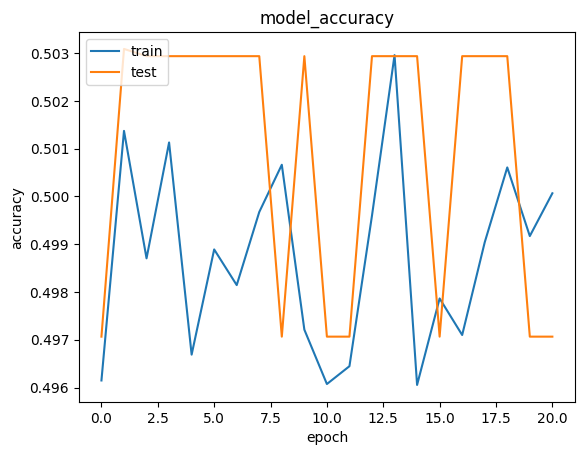

In [84]:
## Summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


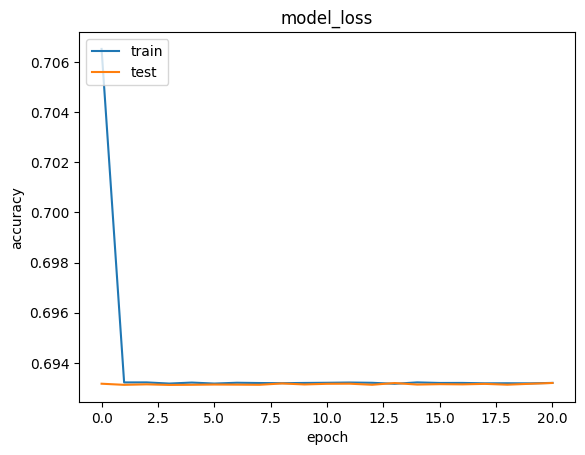

In [85]:

## Summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [86]:

## Making the prediction and evaluating the model

# Predicting the Test set results

y_prd = classifier.predict(X_test)
y_prd = (y_prd >= 0.5)

625/625 [==============================] - 1s 1ms/step


In [87]:
# pickling the Model
import pickle
file = open('Customer_Churn_Prediction.pkl', 'wb')
pickle.dump(Stack, file)